# Neural Networks 

# Classification

## Getting Data

Dataset Fashion MNIST

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [92]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


Scaling values

In [93]:
X_train = X_train/255.0
X_test = X_test/255.0


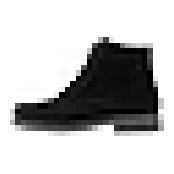

In [94]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[42], cmap="binary")
plt.axis('off')
plt.show()

In [95]:
class_names = ["koszulka", "spodnie", "pulower", 
               "sukienka", "kurtka","sandał",
                "koszula", "półbut", "torba", "but"]
print(class_names[y_train[42]])
# but

but


## Creating neural network model

In [96]:
import keras

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [97]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 300)               235500    
                                                                 
 dense_45 (Dense)            (None, 100)               30100     
                                                                 
 dense_46 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [99]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()


In [100]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=20,
                    validation_split=0.1,
                    callbacks=[tensorboard_cb])


Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.7267 - accuracy: 0.7616 - val_loss: 0.5709 - val_accuracy: 0.8058
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4875 - accuracy: 0.8306 - val_loss: 0.4799 - val_accuracy: 0.8217
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4420 - accuracy: 0.8449 - val_loss: 0.4713 - val_accuracy: 0.8302
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4134 - accuracy: 0.8555 - val_loss: 0.4338 - val_accuracy: 0.8442
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3934 - accuracy: 0.8614 - val_loss: 0.3924 - val_accuracy: 0.8588
Epoch 6/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3772 - accuracy: 0.8668 - val_loss: 0.4045 - val_accuracy: 0.8568
Epoch 7/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3635 - accuracy: 0.8714 - val_loss: 0.3704 - val_accuracy

### Some random prediction

1/1 [==============================] - 0s 64ms/step
Prediction:  torba
Confidence:  0.99321425
Truth:  torba


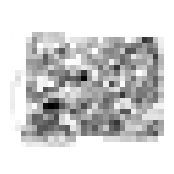

In [101]:
image_index = np.random.randint(len(X_test)) # losowy indeks
image = np.array([X_test[image_index]]) # losowy obraz
confidences = model.predict(image) # prawdopodobienstwa
# print(confidences)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction: ", class_names[prediction])
print("Confidence: ", confidence)
print("Truth: ", class_names[y_test[image_index]])
plt.figure(figsize=(2,2))
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()


In [102]:
# %load_ext tensorboard
# %tensorboard --logdir=./image_logs

In [103]:
model.save('fashion_clf.keras')

# Regression

### Getting data

In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

In [105]:
X = housing['data']
y = housing['target']
print(housing['feature_names'])
print(housing['target_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [106]:
# 80% TRAIN_AND_VALID, 20% TEST
# 90% TRAIN, 10% VALID
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

In [107]:
# warstwa normalizujaca

normalizer = keras.layers.Normalization(
    input_shape=[X_train.shape[1]])

normalizer.adapt(X_train)

In [108]:
model_reg = keras.models.Sequential()

model_reg.add(normalizer)
model_reg.add(keras.layers.Dense(50, activation="relu"))
model_reg.add(keras.layers.Dense(50, activation="relu"))
model_reg.add(keras.layers.Dense(50, activation="relu"))
model_reg.add(keras.layers.Dense(1))



In [109]:
model_reg.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=keras.metrics.RootMeanSquaredError())

In [110]:
model_reg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_47 (Dense)            (None, 50)                450       
                                                                 
 dense_48 (Dense)            (None, 50)                2550      
                                                                 
 dense_49 (Dense)            (None, 50)                2550      
                                                                 
 dense_50 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
_________________

### Early stopping

In [111]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,
                                      verbose=1)

In [112]:
root_logdir = os.path.join(os.curdir, "housing_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()


### Model learing, we can apply big epochs size because early stopping will stop anyway

In [113]:
tensorboard_cb_reg = tf.keras.callbacks.TensorBoard(run_logdir)
history = model_reg.fit(X_train, y_train, epochs=100,   
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb_reg, es])

Epoch 1/100
465/465 [==============================] - 2s 3ms/step - loss: 0.7829 - root_mean_squared_error: 0.8848 - val_loss: 0.4328 - val_root_mean_squared_error: 0.6579
Epoch 2/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3864 - root_mean_squared_error: 0.6216 - val_loss: 0.3752 - val_root_mean_squared_error: 0.6125
Epoch 3/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3500 - root_mean_squared_error: 0.5916 - val_loss: 0.3674 - val_root_mean_squared_error: 0.6062
Epoch 4/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3323 - root_mean_squared_error: 0.5764 - val_loss: 0.3579 - val_root_mean_squared_error: 0.5982
Epoch 5/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3175 - root_mean_squared_error: 0.5635 - val_loss: 0.3435 - val_root_mean_squared_error: 0.5861
Epoch 6/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3087 - root_mean_squared_error: 0.5556 - val_loss: 0.3381 

In [114]:
model_reg.save('reg_housing_1.keras')

In [115]:
test_loss, test_rmse = model_reg.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

129/129 [==============================] - 0s 2ms/step - loss: 0.2968 - root_mean_squared_error: 0.5448
Test Loss (MSE): 0.2968
Test RMSE: 0.5448


### 2 more regression models 

### First one:

In [116]:
model_reg1 = keras.models.Sequential()
model_reg1.add(normalizer)
model_reg1.add(keras.layers.Dense(units=10, activation="relu"))
model_reg1.add(keras.layers.Dense(units=20, activation="relu"))
model_reg1.add(keras.layers.Dense(units=30, activation="relu"))
model_reg1.add(keras.layers.Dense(units=40, activation="relu"))
model_reg1.add(keras.layers.Dense(units=50, activation="relu"))
model_reg1.add(keras.layers.Dense(1))

In [117]:
model_reg1.compile(optimizer='adam', 
                   metrics=keras.metrics.RootMeanSquaredError(),
                   loss='mean_squared_error')

In [118]:
history1 = model_reg1.fit(X_train, y_train,
                          epochs=100, validation_data=(X_valid, y_valid),
                          callbacks=[tensorboard_cb_reg, es])

Epoch 1/100
465/465 [==============================] - 3s 3ms/step - loss: 0.9357 - root_mean_squared_error: 0.9673 - val_loss: 0.5123 - val_root_mean_squared_error: 0.7158
Epoch 2/100
465/465 [==============================] - 1s 3ms/step - loss: 0.4382 - root_mean_squared_error: 0.6619 - val_loss: 0.4278 - val_root_mean_squared_error: 0.6540
Epoch 3/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3967 - root_mean_squared_error: 0.6298 - val_loss: 0.4219 - val_root_mean_squared_error: 0.6495
Epoch 4/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3833 - root_mean_squared_error: 0.6191 - val_loss: 0.4015 - val_root_mean_squared_error: 0.6336
Epoch 5/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3635 - root_mean_squared_error: 0.6029 - val_loss: 0.3984 - val_root_mean_squared_error: 0.6312
Epoch 6/100
465/465 [==============================] - 2s 3ms/step - loss: 0.3524 - root_mean_squared_error: 0.5936 - val_loss: 0.3863 

In [119]:
test_loss, test_rmse = model_reg1.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

129/129 [==============================] - 0s 3ms/step - loss: 0.3142 - root_mean_squared_error: 0.5606
Test Loss (MSE): 0.3142
Test RMSE: 0.5606


In [120]:
model_reg1.save('reg_housing_2.keras')

### Second one:

In [121]:
model_reg2 = keras.models.Sequential()

model_reg2.add(normalizer)
model_reg2.add(keras.layers.Dense(128, activation='selu'))
model_reg2.add(keras.layers.Dense(64, activation='selu'))
model_reg2.add(keras.layers.Dense(32, activation='selu'))
model_reg2.add(keras.layers.Dense(1))

In [122]:
model_reg2.compile(optimizer='adam', 
                   metrics=keras.metrics.RootMeanSquaredError(),
                   loss='mean_squared_error')

In [123]:
model_reg2.fit(X_train, y_train, epochs=100,
               validation_data=(X_valid, y_valid),
               callbacks=[tensorboard_cb_reg, es])

Epoch 1/100
465/465 [==============================] - 4s 5ms/step - loss: 0.6819 - root_mean_squared_error: 0.8258 - val_loss: 0.4365 - val_root_mean_squared_error: 0.6607
Epoch 2/100
465/465 [==============================] - 2s 5ms/step - loss: 0.4248 - root_mean_squared_error: 0.6518 - val_loss: 0.3988 - val_root_mean_squared_error: 0.6315
Epoch 3/100
465/465 [==============================] - 2s 5ms/step - loss: 0.3942 - root_mean_squared_error: 0.6278 - val_loss: 0.3982 - val_root_mean_squared_error: 0.6311
Epoch 4/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3769 - root_mean_squared_error: 0.6139 - val_loss: 0.4120 - val_root_mean_squared_error: 0.6419
Epoch 5/100
465/465 [==============================] - 3s 5ms/step - loss: 0.3598 - root_mean_squared_error: 0.5998 - val_loss: 0.3453 - val_root_mean_squared_error: 0.5877
Epoch 6/100
465/465 [==============================] - 3s 6ms/step - loss: 0.3412 - root_mean_squared_error: 0.5841 - val_loss: 0.3327 

In [124]:
test_loss, test_rmse = model_reg2.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

129/129 [==============================] - 0s 3ms/step - loss: 0.3244 - root_mean_squared_error: 0.5696
Test Loss (MSE): 0.3244
Test RMSE: 0.5696


In [125]:
model_reg2.save('reg_housing_3.keras')